# Analysis of Immigration Canada Subreddit

## Data Cleaning

In [1]:
# Importing libraries
import pandas as pd
import datetime as dt
from datetime import datetime
import seaborn as sns
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


### Data Import

In [2]:
# Importing reddit data from csv
df_all = pd.read_csv('reddit_all_posts.csv')
df_all.name = 'df_all'
df_mixed = pd.read_csv('reddit_mixed_posts.csv')
df_mixed.name = 'df_mixed'
df_top = pd.read_csv('reddit_top_posts.csv')
df_top.name = 'df_top'

# Ensuring 'selftext' column or submission body type string
df_all['selftext'] = df_all['selftext'].astype(str)
df_mixed['selftext'] = df_mixed['selftext'].astype(str)
df_top['selftext'] = df_top['selftext'].astype(str)

### Missing body submission

In [3]:
# Identify the columns with duplicate submission or missing submission body
boolean = df_all.duplicated(subset=['selftext'])

In [4]:
df_all[boolean]['selftext']

14                                                     nan
15                                                     nan
25                                                     nan
31                                                     nan
35                                                     nan
                               ...                        
63816                                            [removed]
63817    My brother is in his mid 20s and has worked fo...
63818                                            [removed]
63819                                            [removed]
63820                                            [removed]
Name: selftext, Length: 63217, dtype: object

In [5]:
# Identify the number of submission body removed
df_all[df_all['selftext'] == '[removed]'].count()

Unnamed: 0         21679
Year               21679
selftext           21679
author             21679
author_fullname    17303
title              21679
link_flair_text    18237
ups                  373
num_comments       21679
id                 21679
media_embed        21679
created_utc        21679
upvote_ratio       20986
dtype: int64

In [6]:
# View submissions with submission body removed to identify if these records should be removed
df_all[df_all['selftext'] == '[removed]'].head()

,Unnamed: 0,Year,selftext,author,author_fullname,title,link_flair_text,ups,num_comments,id,media_embed,created_utc,upvote_ratio
321,321,2015,[removed],immigrationxiphias,NaN,Migrate to Canada,NaN,1.0,0,3yncn5,{},2015-12-29 12:10:57,NaN
328,328,2015,[removed],immigrationxiphias,NaN,Canada Immigration Services Calgary,NaN,1.0,0,3y9xlv,{},2015-12-26 10:48:03,NaN
329,329,2015,[removed],[deleted],NaN,Canada Immigration Services Calgary,NaN,1.0,0,3y9wxe,{},2015-12-26 10:37:57,NaN
340,340,2015,[removed],immigrationxiphias,NaN,XIPHIAS IMMIGRATION REVIEWS - CUSTOMER REVIEWS,NaN,1.0,0,3xxptx,{},2015-12-23 06:58:44,NaN
362,362,2015,[removed],ghimmigration,NaN,Golden Hands Immigration Inc. GH Immigration Inc.,NaN,0.0,0,3x1rxa,{},2015-12-16 06:27:00,NaN


In [7]:
# Identify submissions with no submission body
df_all[df_all['selftext'] =='nan'].count()

Unnamed: 0         3084
Year               3084
selftext           3084
author             3084
author_fullname    2234
title              3084
link_flair_text    1864
ups                 605
num_comments       3084
id                 3084
media_embed        3084
created_utc        3084
upvote_ratio       1691
dtype: int64

In [8]:
# View submissions with no submission body to identify if these records should be kept
df_all[df_all['selftext'] == 'nan'].head(5)

,Unnamed: 0,Year,selftext,author,author_fullname,title,link_flair_text,ups,num_comments,id,media_embed,created_utc,upvote_ratio
9,9,2013,nan,CramBoom,NaN,So you think you're Canadian? - Game-show to t...,NaN,1.0,0,1pbs0y,"{'width': 600, 'height': 450, 'content': '&lt;...",2013-10-27 18:31:22,NaN
14,14,2013,nan,ranger28,NaN,Canadian Immigration | live and work in Canada...,NaN,0.0,0,1md4wi,{},2013-09-14 06:22:35,NaN
15,15,2013,nan,[deleted],NaN,Canada’s new immigration program welcomes firs...,NaN,1.0,0,1kknpp,{},2013-08-17 22:32:50,NaN
25,25,2013,nan,ninjah778,NaN,Immigration tips for students/visitors - getti...,NaN,1.0,0,1bflor,{},2013-04-01 17:31:55,NaN
31,31,2013,nan,[deleted],NaN,At the moment. All posts seem to be hitting th...,NaN,4.0,4,189fty,{},2013-02-10 20:05:51,NaN


In [9]:
# Function to remove submissions with removed body or Nan
def submission_body(df):
    """Function to drop rows associated with submissions where selftext is removed or Nan
    Input: Dataframe
    Output: Count of submissions with no body, count of submission with removed body, and dataframe info"""
    no_body = df[df['selftext'] == 'nan']
    removed = df[df['selftext'] == '[removed]']
    df.drop(no_body.index, inplace=True)
    df.drop(removed.index, inplace=True)
    print('Submissions with no body removed:', no_body.count())
    print('Submission with removed body:', removed.count())
    print(df.info())
    return df

In [10]:
# Apply function to current dataframes
df_all_analysis = submission_body(df_all.copy())
df_mixed_analysis = submission_body(df_mixed.copy())
df_top_analysis = submission_body(df_top.copy())


Submissions with no body removed: Unnamed: 0         3084
Year               3084
selftext           3084
author             3084
author_fullname    2234
title              3084
link_flair_text    1864
ups                 605
num_comments       3084
id                 3084
media_embed        3084
created_utc        3084
upvote_ratio       1691
dtype: int64
Submission with removed body: Unnamed: 0         21679
Year               21679
selftext           21679
author             21679
author_fullname    17303
title              21679
link_flair_text    18237
ups                  373
num_comments       21679
id                 21679
media_embed        21679
created_utc        21679
upvote_ratio       20986
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39058 entries, 0 to 63817
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       39058 non-null  int64  
 1   Year             3905

### Missing category & Other category

#### Submission body

In [11]:
# Create text for Wordcloud
text = "".join(i for i in df_all_analysis.selftext)

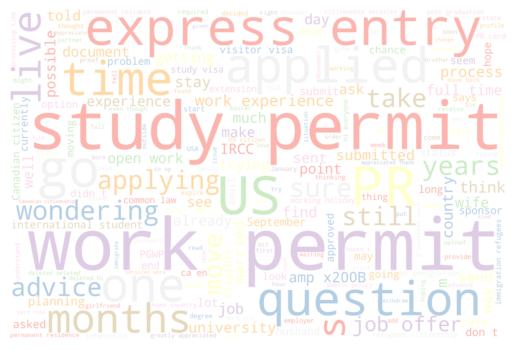

In [12]:
# Create wordcloud
custom_stop_words = ['Canada', 'know', 'want', 'now', 'will', 'got', 'year', 'still possible', 'need','able', 'apply', 'say', 'received', 'U', 'help', 'anyone','month', 'looking', 'application']
stopwords = list(STOPWORDS) + custom_stop_words
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='Pastel1', stopwords=stopwords).generate(text)

# Display the generated word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Wordcloud of submissions with missing or other category

In [13]:
# Filter the df_all_analysis dataframe for missing or other category
mask = (df_all_analysis['link_flair_text'].isna())|(df_all_analysis['link_flair_text'] == 'Other')
df_all_missing_other = df_all_analysis[mask]

In [14]:
# Create text for wordcloud
text_missing_other = "".join(i for i in df_all_missing_other['selftext'])

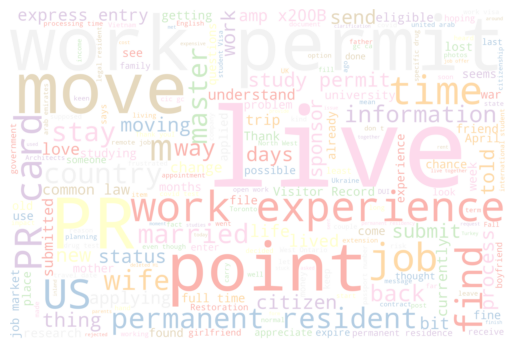

In [76]:
# Create wordcloud
custom_stop_words_other = ['question', 'really', 'go','years', 'trying', 'advice','anything','take', 'day', 'much', 'think', 'one', 'sure', 'wondering', 'seem', 'ask', 'September', 'make', 'S', 'thinking', 'Canadian', 'going', 'lot', 'hope', 'give'] 
stopwords = stopwords + custom_stop_words_other

wordcloud_missing_other = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='Pastel1', stopwords=stopwords).generate(text_missing_other)

# Display wordcloud
plt.imshow(wordcloud_missing_other, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# Categories available
all_categories = df_all_analysis['link_flair_text'].unique()
print(all_categories)

[nan 'Working Holiday' 'Study Permit' 'Visitor Visa' 'Express Entry'
 'Other' 'Sponsorship' 'Work Permit' 'PNP' 'Quebec' 'Citizenship']


In [84]:
def category_change(row):
    PR_related = ['PR card', 'permanent resident', 'PR']
    if (row['link_flair_text'] == 'Other'):
        if ('work permit' in row['selftext']):
            row['link_flair_text'] = 'Work Permit'
        elif ('study permit' in row['selftext']):
            row['link_flair_text'] = 'Study Permit'
        elif ('express entry' in row['selftext']):
            row['link_flair_text'] = 'Express Entry'
        elif any(x in row['selftext'] for x in PR_relat):
            row['link_flair_text'] = 'Permanent Resident'
    return row


In [85]:
copy = df_all_analysis.copy()
copy

,Unnamed: 0,Year,selftext,author,author_fullname,title,link_flair_text,ups,num_comments,id,media_embed,created_utc,upvote_ratio
0,0,2013,I am Indian. I want to study in Canada and I w...,geekpirate1,NaN,Applying for Visa,NaN,1.0,2,1tusw5,{},2013-12-28 04:06:59,NaN
1,1,2013,"So, recently, a friend of mine worked on a doc...",[deleted],NaN,Petition to let Naim stay in Canada under refu...,NaN,1.0,0,1szl5v,{},2013-12-16 05:30:08,NaN
2,2,2013,I have friend from Denmark who is very interes...,BreaksFull,NaN,I have a friend looking to immigrate to Canada...,NaN,1.0,6,1ssxf6,{},2013-12-13 16:25:00,NaN
3,3,2013,"I recently finished my undergrad studies, and ...",modestlymousey,NaN,My bf and I are wanting to move to Vancouver i...,NaN,0.0,0,1si5k9,{},2013-12-09 23:56:26,NaN
4,4,2013,"I'd imagine my situation is somewhat typical, ...",CCeee,NaN,Starting Questions!,NaN,1.0,3,1scy1o,{},2013-12-08 02:25:05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63808,63808,2023,"Hi, my friend told me about a problem yesterda...",Sheriffmcgirthy,t2_2fz44o7z,Too Late Out Of Status After 90 days ( How To ...,Study Permit,NaN,0,132xr0h,{},2023-04-29 15:16:26,1.0
63811,63811,2023,I was accepted into a postgraduate program at ...,Ok_Syrup_6395,t2_8ckjembd,Employment verification for student visa,Study Permit,NaN,0,132uh71,{},2023-04-29 14:25:22,1.0
63812,63812,2023,"Hi,\n\nAppreciate if someone can advise on PR ...",wahabr1az,t2_xjdhj9f,Travel without PR Card,Express Entry,NaN,0,132tkpp,{},2023-04-29 13:57:05,1.0
63814,63814,2023,If I don’t declare 5 months (nov21-march22) of...,Internal_Ticket2348,t2_9yg7tji4,Work experience,Express Entry,NaN,0,132sqin,{},2023-04-29 13:19:21,1.0


In [86]:
copy_category = copy.apply(category_change, axis=1)

TypeError: 'in <string>' requires string as left operand, not list

In [73]:
copy_category.value_counts('link_flair_text')

link_flair_text
Express Entry      6967
Study Permit       5531
Work Permit        5126
Other              4802
Sponsorship        4220
Visitor Visa       2411
Citizenship        1047
PNP                 893
Working Holiday     757
Quebec              518
dtype: int64

In [79]:
copy_category_missing = copy_category[copy_category['link_flair_text'] == 'Other']
reclassify = "".join(i for i in copy_category_missing['selftext'])

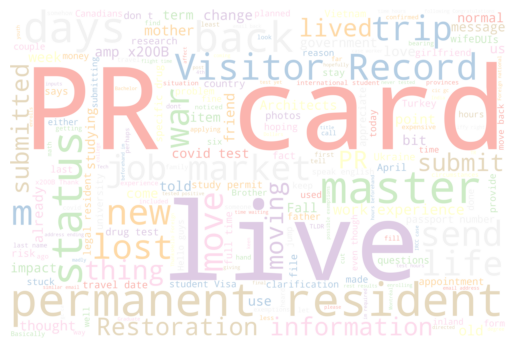

In [80]:
wordcloud_reclassify_other = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='Pastel1', stopwords=stopwords).generate(reclassify)

# Display wordcloud
plt.imshow(wordcloud_reclassify_other, interpolation='bilinear')
plt.axis('off')
plt.show()

### Unsupported media